In [ ]:
#선형회귀 모델 구축

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.datasets import boston_housing
 #한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#시각화 라이브러리에 사용되는 한글 폰트 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
#데이터 불러오기
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data() #X는 가격 예측을 위한 데이터(독립변수) Y는 주택 가격(종속변수)

65536/57026 [==================================] - 0s 0us/step


In [ ]:
train_X.shape #404개의 train 샘플 13가지 수치

(404, 13)

In [ ]:
test_X.shape  #102개의 test 샘플 13가지 수치
#train데이터와 test데이터 8:2<-가장 이상적

(102, 13)

**2022.01.03실습코드 Data Set Characteristics:**  

    :Number of Instances: 506<-여기서 404개는 train_data, 102개는 test_data 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
 

In [ ]:
#데이터 전처리(정규화)
#데이터의 단위가 다른 경우는 비교하기 힘드므로(모델학습에 문제가 발생할 수 있음),
# 일반적으로 전처리(Preprocessing) 과정에서 데이터를 정규화해줌 0~1범위
x_mean = train_X.mean(axis=0) #평균
x_std = train_X.std(axis=0)   #분산
train_X -= x_mean #train_X=train_X - x_mean
train_X /= x_std  #train_X=train_X / x_std
test_X -= x_mean  #test_X=test_X - x_mean
test_X /= x_std   #test_X=test_X / x_std

y_mean = train_Y.mean(axis=0) #평균
y_std = train_Y.std(axis=0)   #분산
train_Y -= y_mean #train_Y=train_Y - y_mean
train_Y /= y_std  #train_Y=train_Y / y_std
test_Y -= y_mean  #test_Y=test_Y - y_mean
test_Y /= y_std   #test_Y=test_Y / y_std

In [ ]:
print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [ ]:
#Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(train_X.shape[1],)), #샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성
    tf.keras.layers.Dense(units=64, activation='relu'),                         #일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 한 방법
    
    tf.keras.layers.Dense(units=1) #하나의 연속적인 값을 예측하는 회귀를 위한 선형층 네트워크가 어떤 범위의 값이라도 예측하도록 자유롭게 학습되도록 활성화 함수 적용X 
])                                 #마지막 레이어는 주택가격인 Y값 1개만 예측하면 되기 때문에 뉴런의 수가 1개

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse') #Adam옵티마이저:학습률을 줄여나가고 속도를 계산하여 학습의 갱신도강도를 적응적으로 조정해나가는 방법

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_X, train_Y, epochs=40, batch_size=32, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')],validation_split=0.25,verbose=1) 
#EarlyStopping:모델을 더 이상 학습을 못할 경우(loss등의 개선이 없을 경우), 학습 도중 미리 학습을 종료시키는 콜백함수
#val_loss가 더이상 감소되지 않을 경우 EarlyStopping을 적용
#GPU/RAM에서 일반적으로 작동하는 방식이 2의 제곱이기 때문에 2의 제곱이 아닌 다른 숫자를 설정하면 비효율적이며 성능 저하가 일어날 수 있음

Epoch 1/40
10/10 [==============================] - 2s 18ms/step - loss: 3.7667 - val_loss: 1.3254
Epoch 2/40
10/10 [==============================] - 0s 7ms/step - loss: 0.5844 - val_loss: 0.5514
Epoch 3/40
10/10 [==============================] - 0s 5ms/step - loss: 0.3513 - val_loss: 0.4428
Epoch 4/40
10/10 [==============================] - 0s 5ms/step - loss: 0.2905 - val_loss: 0.3314
Epoch 5/40
10/10 [==============================] - 0s 6ms/step - loss: 0.2204 - val_loss: 0.3072
Epoch 6/40
10/10 [==============================] - 0s 5ms/step - loss: 0.1851 - val_loss: 0.2887
Epoch 7/40
10/10 [==============================] - 0s 7ms/step - loss: 0.1715 - val_loss: 0.3222
Epoch 8/40
10/10 [==============================] - 0s 5ms/step - loss: 0.2068 - val_loss: 0.2055
Epoch 9/40
10/10 [==============================] - 0s 6ms/step - loss: 0.1221 - val_loss: 0.1776
Epoch 10/40
10/10 [==============================] - 0s 6ms/step - loss: 0.1054 - val_loss: 0.1894
Epoch 11/40
10/10 

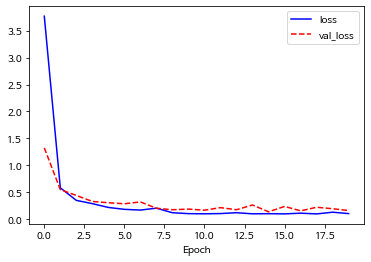

In [ ]:
#회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)
#낮은 손실값

4/4 [==============================] - 0s 3ms/step - loss: 0.2319


0.2319420874118805

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


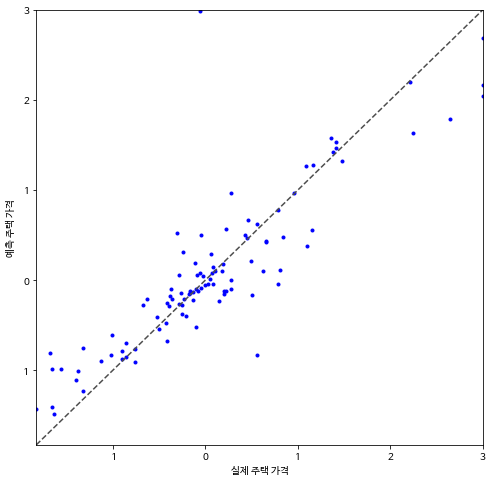

In [ ]:
#실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('실제 주택 가격')
plt.ylabel('예측 주택 가격')

plt.show()

In [ ]:
# Root Mean Squared Error (제곱근 평균 제곱 오차)
import math
mse = tf.keras.losses.MeanSquaredError()
math.sqrt(mse(train_Y, pred_Y).numpy())

1.3287782296800208

In [ ]:
# Mean Absolute Error (평균 절대 오차)
mae = tf.keras.losses.MeanAbsoluteError()
mae(train_Y, pred_Y).numpy()

1.0029565

In [ ]:
# Mean Absolute Percentage Error (평균 절대 백분율 오차)
mape = tf.keras.losses.MeanAbsolutePercentageError()
mape(train_Y, pred_Y).numpy()

681.4621